In [1]:
import sys
sys.path.insert(0, '../util')
sys.path.insert(0, '..')
from sc import *
import matplotlib.pyplot as plt
import matplotlib
from alg import hstar, k_rollout, almost_equal, bhattacharya
from plot import plot_path, several_path_plot, plot_sc
from pqdict import pqdict

<AxesSubplot:>

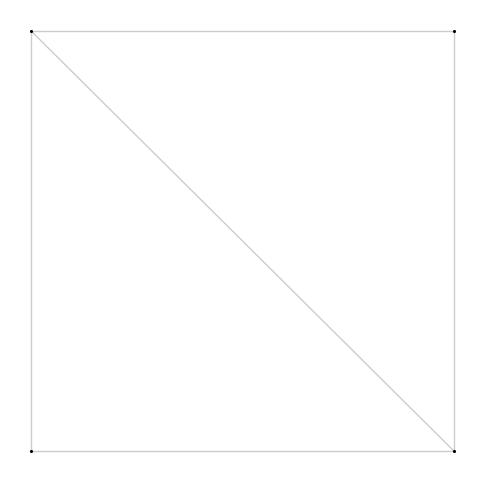

In [77]:
K2 = SimplicialComplex(2, False, False, True)
plot_sc(K2)

In [78]:
np.mean([x[1] for x in K2.G.degree])

2.5

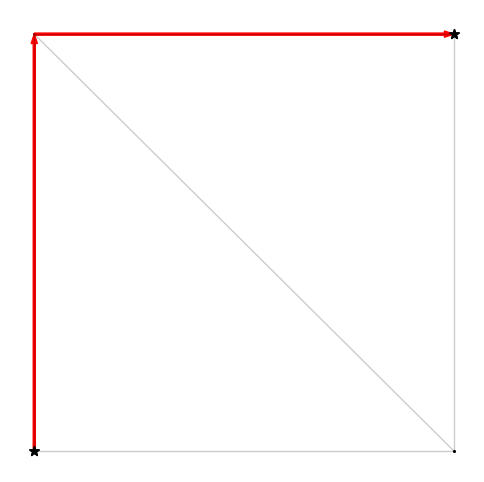

In [79]:
p1 = path_from_coords(K2, [(-1,-1), (0,-1), (0,1), (1,1)])
plot_path(K2, p1, "red", "")
start, end = p1[0], p1[-1]

In [82]:
alpha_k2 = 0.3
path, _, _, _, _ = hstar(K2, p1[0], p1[-1], p1.proj, alpha_k2, False, False)
path_roll0, best_costs0, best_paths0, visited0 = k_rollout(K2, p1, alpha_k2, 0, False)
path_roll1, best_costs1, best_paths1, visited1 = k_rollout(K2, p1, alpha_k2, 1, False, 0.01)
path_roll2, best_costs2, best_paths2, visited2 = k_rollout(K2, p1, alpha_k2, 1, True, 0.01)

In [85]:
visited0, visited1, visited2

(4, 10, 10)

In [59]:
len(path_roll0)

7

In [49]:
visited1/visited0

12.478260869565217

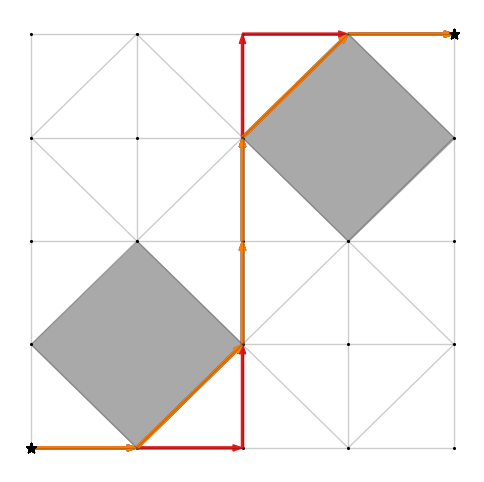

In [43]:
labels = ["ref", "h*", "roll 0", "roll 1", "roll 2"]
ax = several_path_plot(K2, [p1, path, path_roll0, path_roll1, path_roll2], labels)
ax.get_legend().remove()

In [6]:
eps=1e-7
path_bhat, other_paths_bhat, num_visited_bhat = bhattacharya(K2, p1, start, end, eps, True, True)

Found path with projection difference = 1.2385502016 and length  = 2.97
Found path with projection difference = 0.0 and length  = 3.27


In [7]:
path_bhat

0-1-2-3-13-23-33-43-52-61-71-80

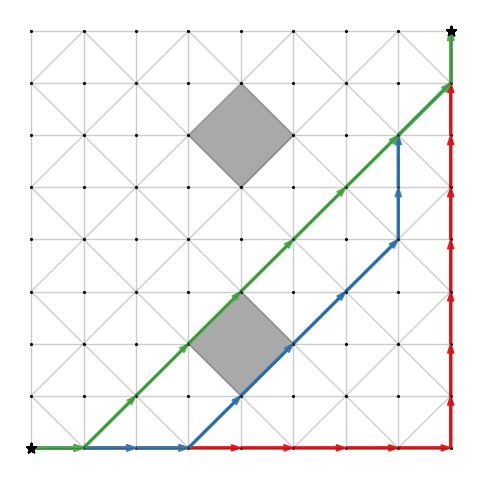

In [8]:
labels = ["ref", "x^*", "x_{shortest}"]
ax = several_path_plot(K2, [p1] + [path_bhat] + other_paths_bhat, labels)
ax.get_legend().remove()